In [9]:
# prompt: armae un dataframe de al menos 100 filas con datos random con çapellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Define possible values for columns
materias = ['Matemática', 'Lengua y Literatura', 'Historia', 'Geografía', 'Ciencias Naturales', 'Educación Física', 'Inglés', 'Formación Ética y Ciudadana', 'Artes', 'Música', 'Tecnología']
apellidos = ['Gomez', 'Rodriguez', 'Perez', 'Gonzalez', 'Martinez', 'Lopez', 'Garcia', 'Sanchez', 'Romero', 'Torres']
nombres = ['Juan', 'Maria', 'Jose', 'Ana', 'Pedro', 'Sofia', 'Luis', 'Laura', 'Carlos', 'Elena']


# Create a list to store data for the DataFrame
data = []

# Generate 100 rows of random data
for i in range(100):
    apellido = random.choice(apellidos)
    nombre = random.choice(nombres)
    dni = np.random.randint(10000000, 99999999)  # Generate random DNI
    materia = random.choice(materias)
    nota1 = np.random.randint(1, 11)
    nota2 = np.random.randint(1, 11)
    nota3 = np.random.randint(1, 11)
    faltas = np.random.randint(0, 20)  # Random number of absences
    data.append([apellido, nombre, dni, materia, nota1, nota2, nota3, faltas])


# Create the DataFrame
df = pd.DataFrame(data, columns=['Apellido', 'Nombre', 'Nro_DNI', 'Materia Escolar', 'Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre', 'Faltas a clases'])

df

,Apellido,Nombre,Nro_DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Sanchez,Luis,58747707,Lengua y Literatura,3,7,7,18
1,Gonzalez,Laura,41081349,Matemática,9,9,1,19
2,Rodriguez,Elena,10061644,Lengua y Literatura,5,8,10,10
3,Lopez,Maria,42022626,Historia,4,5,2,15
4,Gonzalez,Jose,57188242,Tecnología,5,7,7,7
...,...,...,...,...,...,...,...,...
95,Garcia,Carlos,70550840,Tecnología,3,6,10,5
96,Torres,Luis,46359220,Educación Física,10,8,7,8
97,Lopez,Ana,77312881,Matemática,6,2,4,15
98,Perez,Elena,55922637,Matemática,10,8,4,15


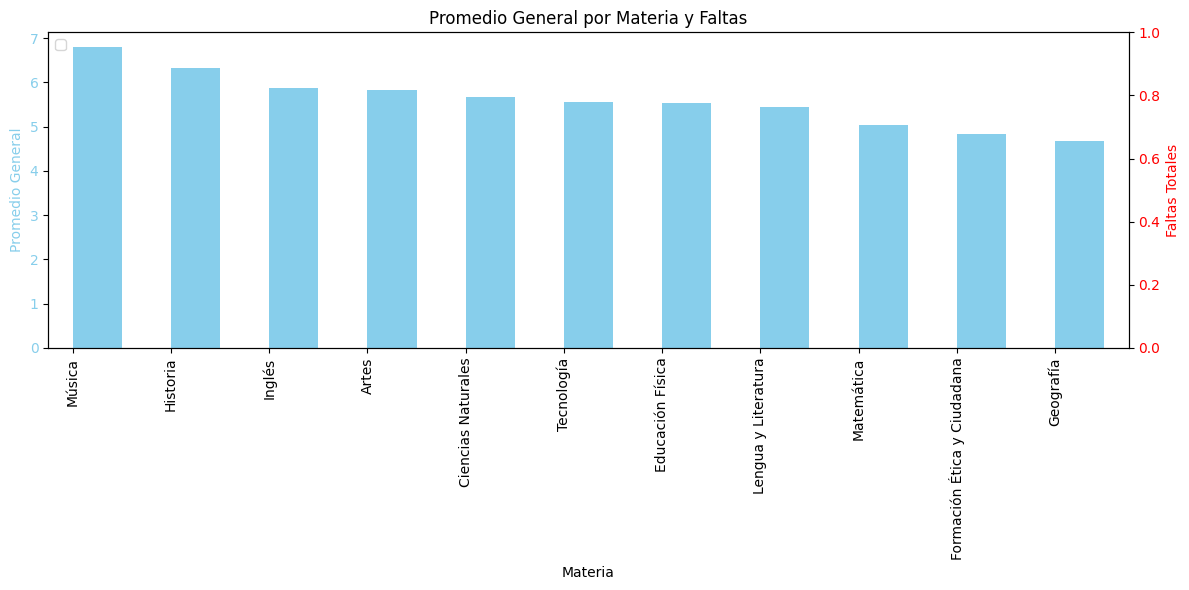

In [13]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calculate the average grade for each subject
average_grades = df.groupby('Materia Escolar').agg({'Nota 1er Trimestre': 'mean', 'Nota 2do Trimestre': 'mean', 'Nota 3er Trimestre': 'mean'})
average_grades['Promedio General'] = average_grades.mean(axis=1)
average_grades = average_grades.sort_values('Promedio General', ascending=False)

# Calculate the total absences for each subject
total_absences = df.groupby('Materia Escolar')['Faltas a clases'].sum()

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average grades
average_grades['Promedio General'].plot(kind='bar', color='skyblue', ax=ax1, position=0)
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xlabel('Materia')
ax1.set_title('Promedio General por Materia y Faltas')

# Create a second y-axis for absences
ax2 = ax1.twinx()

ax2.set_ylabel('Faltas Totales', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add labels and title
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(['Promedio General', 'Faltas Totales'], loc='upper left')

plt.show()